# Implementation of AB Testing in Marketing Company

![image](https://bithourproduction.com/blog/wp-content/uploads/2022/12/what-is-marketing.png)

### A. Introduction & Background

A public service announcement (PSA) is a message created and distributed in the media to inform and educate the public about a particular issue or topic. PSAs are typically sponsored by nonprofit organizations, government agencies, or other public interest groups and are intended to raise awareness, change attitudes, and encourage positive behaviors.

PSAs can take many forms, including television or radio commercials, print ads, billboards, social media posts, and online videos. They can address a wide range of topics, from public health and safety to environmental issues, social justice, and civic engagement.

PSAs are a valuable tool for promoting public awareness and social change because they are often produced and distributed at no cost to the organizations or individuals involved. They can also reach a large audience and have a significant impact on public opinion and behavior.

Marketing companies want to run successful campaigns, but the market is complex and several options can work. So normally they tun A/B tests, that is a randomized experimentation process wherein two or more versions of a variable (web page, page element, banner, etc.) are shown to different segments of people at the same time to determine which version leaves the maximum impact and drive business metrics.
The companies are interested in answering two questions:

-	Would the campaign be successful?
-	If the campaign was successful, how much of that success could be attributed to the ads?

With the second question in mind, we normally do an A/B test. The majority of the people will be exposed to ads (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement (PSA) (or nothing) in the exact size and place the ad would normally be.

The idea of the dataset is to analyze the groups, find if the ads were successful, how much the company can make from the ads, and if the difference between the groups is statistically significant.
Data dictionary:

-	Index: Row index
-	user id: User ID (unique)
-	test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
-	converted: If a person bought the product then True, else is False
-	total ads: Amount of ads seen by person
-	most ads day: Day that the person saw the biggest amount of ads
-	most ads hour: Hour of day that the person saw the biggest amount of ads

### B. Setting Up Problem

#### •	Experimental Goal

The experimental goal for AB testing on marketing PSA and ad could be to determine which advertising approach is more effective in increasing brand awareness and driving conversions. Specifically, the goal could be to identify which version of the advertising campaign generates higher click-through rates, conversion rates, and ultimately, higher ROI.

To achieve this, the experiment could be designed to compare two versions of the same advertising campaign (A and B), with one version featuring a PSA approach and the other version featuring a traditional ad approach. The experiment could then measure the effectiveness of each approach by tracking metrics such as click-through rates, conversion rates, and revenue generated. The ultimate goal would be to identify which approach generates the most positive results, and to use that information to inform future advertising strategies.

#### •	Choosing Metrics

To formulating the experimental metrics, there are several step that should be done. First, we should define the objective experiment. After that, identify how to achieve the objective. From the objective an how to achieve, we can decide the intended outcomes that want to be fulfill. After that, we can decide the Driver Metrics and Guardrail Metrics.

Driver Metrics should be in line with the goal metric, sensitive, actionable and can be meaningful by short-term experiment. Those characteristics lead the metrics fit with the experiment.
Guardrail metrics give an alert about outcome of the experiment that potentially misleading. These metrics monitor the trade-off that undesirably happen. Also can be use for sanity check about outcome experiment. 
There are 2 kind of guardrail metrics:

**a.	Organizational Guardrail Metrics**
-	To see if there any others trade-off happen when running the initiative
-	If these metrics lead to negative impact, the business can lead to losses

**b.	Trust-Related Guardrail Metrics**
-	 Monitoring level of confidence (trustworthiness) of the experiment
-	Checking the infraction of assumptions

From those aspects that have been told before, the writer determines all those metrics that needed to this experiment. Here it is the outcome of the metrics.

![image](https://i.ibb.co/WBFxWG8/Picture1.png)

To determine the driver metrics, the metrics should be use to monitor the behavior of the user from data collected (measurable). This metrics also can be used to measure the effect of initiave from variant control & treatment (Attributable). Driver metric is leading indicator from goal metrics. So this metrics should have enough variability that can differentiate treatment and control (Sensitivity). Last, the metrics should can be measure by short-term (Timely). By all of those characteristics, writers choose Conversion Rates become Driver Metrics of this AB Testing cases.


#### •	Choosing Metrics

- Control	: Public Service Announcements (PSA)
-Treatment : Creative Ads, such as
            a.	Ads with a good headline
            b.	Make the text of information in ads more  concise and informative
            Good CTA button that can invite customers to engange.
            E.g : “Get Started Now”, or “Buy Now”


![image](https://i.ibb.co/RDqdPT8/Picture2.png)

The experiment using total ads below and above 15 based on median of total ads each customer.

#### •	Define Hypothesis

We want to compare whether group $i$ th is more than group $j$ th, so we use one sided (right tail) hypothesis testing.

we want to prove whether the conversion rate of group $j$ is greater than the conversion rate of group $i$

The hypothesis for each group pair is as follows:
- group A vs group B
    $$H_0 : p_B \leq p_A$$
    $$H_1 : p_B > p_A$$

- group A vs group C
    $$H_0 : p_C \leq p_A$$
    $$H_1 : p_C > p_A$$

- group A vs group D
    $$H_0 : p_D \leq p_A$$
    $$H_1 : p_D > p_A$$

- group B vs group C
    $$H_0 : p_C \leq p_B$$
    $$H_1 : p_C > p_B$$

- group B vs group D
    $$H_0 : p_D \leq p_B$$
    $$H_1 : p_D > p_B$$

- group C vs group D
    $$H_0 : p_D \leq p_C$$
    $$H_1 : p_D > p_C$$

### C.	Designing Experiments

#### •	Randomization Unit

Randomization unit is “who” or “what” kind of thinks that allocated randomly to each group. To get more context of the experiment, we’re limiting the population of people in Jakarta.

#### •	Target of randomization unit

Target of randomization unit is all user that exposed by Public Service Announcement and Creative Ads in Jakarta. Also, we would considering about total ads that expose to the customer as variant of the randomization unit


#### •	Sample size

Size of sample will affect the power of evidence to show validity the experiment. 

**a.	Significant level (α)**

α = P (Accept H1 | Ho right)

That means opportunities to accept H1, whereas Ho right. Because those things is wrong, so we should reduce the α value. Conservatively, industry rules using 5% or 1% for α values. We’re determined to use α = 5% as significant level.

**b.	Power level (1 - β)**

1 – β = P (Reject Ho | Ho wrong)

That means opportunities to reject Ho, whereas Ho wrong. Because those things is right, so we should increase the 1 - β value. Conservatively, industry rules using 80% for power lever. We’re determined to use 1 - β = 80% as power level.

**c.	Standard deviation of population (σ)**

For this experiment, we make an assumption of standar deviation populiation is 0.1

**d.	Difference between control and treatment (δ)**

For business propose, we make an assumption that these treatment will be profitable if the conversion rate increase 1%. So, the management will be implemented the Creative ads rather than PSA because the impact of increasing conversion rate.


#### • Calculating Sample Size

#### How many minimum sample size are needed when $\alpha=5 \%$ and power 80%?

- Remember, we can use the given formula to calculate the minimum number of sample size needed.

$$
n = \cfrac{2 \sigma^2 (z_{1-\alpha/2}+z_{1-\beta})^2}{\delta^2}
$$

- Thus, if we have the $z$ value, we can determine the number of sample.


In [8]:
#Import package yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import scipy.stats as st
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt

In [9]:
# Given
delta = 0.01        # absolute increase of two groups means
alpha = 0.05        # significance level
power = 0.8         # power
std_dev = 0.1      # variance of population (assumed / approximated)

In [10]:
# calculate beta
beta = 1 - power
beta

0.19999999999999996

In [11]:
# calculate the z value
z_alpha = stats.norm.ppf(1 - alpha/2)
z_beta = stats.norm.ppf(1 - beta)

z_alpha, z_beta

(1.959963984540054, 0.8416212335729143)

In [12]:
# then calculate the number of sample size
n = 2 * (std_dev**2) * ((z_alpha+z_beta)**2) / (delta**2)

print(f"Number of sample size needed    : {n:.2f}")

Number of sample size needed    : 1569.78


**In conclusion**
- We need 1.570 samples in one group
- and 6.280 sample for four groups.

#### 2. Determine the power of your experiment if you can only collect 1.500 samples for each groups in one week.

- Suppose you run the experiment in one week
- and can collect 1.500 samples for each group
- Determine power of experiments.

**First way**
- We can reform the sample size formula. from

$$
n = \cfrac{2 \sigma^2 (z_{1-\alpha/2}+z_{1-\beta})^2}{\delta^2}
$$

- to
$$
z_{1-\beta} = \sqrt{\cfrac{n \delta^{2}}{2 \sigma^{2}}} - z_{1-\alpha/2}
$$

In [13]:
# Given
n = 1500          # assume that is the minimum sample size we use
delta = 0.01    
std_dev = 0.1
alpha = 0.05

In [14]:
# Calculate the z_alpha
z_alpha = stats.norm.ppf(1 - alpha/2)
z_alpha

1.959963984540054

In [15]:
# Calculate the z_beta
z_beta = np.sqrt((n * (delta**2))/(2 * std_dev**2)) - z_alpha
z_beta

0.7786488029857761

- From the given $z_{1-\beta}$ find $1-\beta$ or power

In [16]:
# using library stats.norm.sf(z_value)
beta = stats.norm.sf(z_beta)
print(f"beta          t  : {beta:.2f}")

# find power
power = 1 - beta
print(f"Power in 1 week : {power*100:.2f} %")

beta          t  : 0.22
Power in 1 week : 78.19 %


**Second way**
- We can calculate it by using `power.TTestIndPower.power()`

In [17]:
# Given
n = 1500          # assume that is the minimum sample size we use
delta = 0.01    
std_dev = 0.1
alpha = 0.05

In [18]:
# parameters for power analysis
effect_size = delta/std_dev

# Initiate the power analysis
power_analysis = TTestIndPower()

# Calculate power
power = power_analysis.power(effect_size = effect_size, 
                             alpha = alpha, 
                             nobs1 = n, 
                             ratio = 1)

# Print results
print(f"Power in 1 week : {power*100:.2f} %")

Power in 1 week : 78.16 %


- In that case, we don't know the standard deviation of the conversion rate.
- However, we can calculate the standard deviation with the information of current baseline conversion rate.
- The conversion event is a Bernoulli trial, with $\hat{p}=0.02$
- We can calculate the standard deviation by using the following formula with approach of Bernoulli distribution:

$$\sigma=\sqrt{\hat{p}(1-\hat{p})}$$


In [19]:
# calculate standar deviation

#given 
p=0.02

std_dev = np.sqrt(p*(1-p))
std_dev

0.13999999999999999

In [20]:
# Given
delta = 0.01        # absolute increase of two groups means
alpha = 0.05        # significance level
power = 0.8         # power


In [21]:
# calculate beta
beta = 1 - power
beta

0.19999999999999996

In [22]:
# calculate the z value
z_alpha = stats.norm.ppf(1 - alpha/2)
z_beta = stats.norm.ppf(1 - beta)

z_alpha, z_beta

(1.959963984540054, 0.8416212335729143)

In [23]:
# then calculate the number of sample size
n = 2 * (std_dev**2) * ((z_alpha+z_beta)**2) / (delta**2)

print(f"Number of sample size needed    : {n:.2f}")

Number of sample size needed    : 3076.76


Because standar deviation is higher, so the sample size is higher.

**In conclusion**
- We need 3.080 samples in one group
- and 12.320 sample for four groups.

#### • How long the experiment

For make an assumption that every week we can gain 3.000 samples, so we can calculate the experiment time is 5 weeks

### D.	Running Experiment and Obtaining Data

Since we can’t collect data directly, we’re assume the following dataset is our experiment. We can take a sample according to the experimental design we made by Designing Experiment.

Import data **marketing_AB.csv** 

In [24]:
#Import data
df = pd.read_csv('marketing_AB.csv')

#Tampilkan 5 data teratas
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


- Terlihat data terdiri atas 7 fitur (`Unnamed: 0`, `user id`, `test group`, `converted`, `total ads`, `most ads day`, dan `most ads hour`)
- Berikut adalah deskripsi masing-masing fitur : 
 -  `Unnamed: 0` : Index
 -  `user id` : unique user identificator
 -  `test group` : termasuk ke dalam kelompok psa atau ad
 - `converted` : True (terjadi konversi pembelian) dan False (tidak terjadi konversi pembelian)
 - `total ads` : jumlah ads yang tayang dan dilihat oleh user
 - `most ads day` : hari dengan tanyangan paling banyak dilihat oleh user
 - `most ads hour` : jam terbanyak dalam satu hari untuk melihat ad / psa

In [25]:
# Cari ukuran data
df.shape

(588101, 7)

In [26]:
# Drop Unnamed: 0 karena merupakan index yang tidak dibutuhkan
df = df.drop('Unnamed: 0',axis = 1)
df

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


**Pre-Analysis**

In [27]:
# Checking duplicate data
df.duplicated(['user id']).sum()

0

In [28]:
# Checking missing value
df.isna().sum()

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [29]:
# Get data shape
df.shape

(588101, 6)

In [30]:
#Overview data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


#### Menambah fitur baru untuk menentukan group A, B, C, dan D

In [31]:
df['total ads group'] = df['total ads']

In [32]:
for i in range(len(df)):
    if df['total ads group'][i] > 15:
        df['total ads group'][i] = '>15'
    elif df['total ads group'][i] <= 15:
        df['total ads group'][i] = '<15'

C:\Users\Axel\AppData\Local\Temp/ipykernel_26668/3671407745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total ads group'][i] = '>15'


In [33]:
df['group'] = 0

In [34]:
for i in range(len(df)):
    if df['test group'][i] == 'psa' and df['total ads group'][i] == '<15':
        df['group'][i] = 'A'
    elif df['test group'][i] == 'psa' and df['total ads group'][i] == '>15':
        df['group'][i] = 'B'
    elif df['test group'][i] == 'ad' and df['total ads group'][i] == '<15':
        df['group'][i] = 'C'
    elif df['test group'][i] == 'ad' and df['total ads group'][i] == '>15':
        df['group'][i] = 'D'

C:\Users\Axel\AppData\Local\Temp/ipykernel_26668/1122302527.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'][i] = 'D'


In [38]:
df

,user id,test group,converted,total ads,most ads day,most ads hour,total ads group,group
0,1069124,ad,False,130,Monday,20,>15,D
1,1119715,ad,False,93,Tuesday,22,>15,D
2,1144181,ad,False,21,Tuesday,18,>15,D
3,1435133,ad,False,355,Tuesday,10,>15,D
4,1015700,ad,False,276,Friday,14,>15,D
...,...,...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23,<15,C
588097,1327975,ad,False,1,Tuesday,23,<15,C
588098,1038442,ad,False,3,Tuesday,23,<15,C
588099,1496395,ad,False,1,Tuesday,23,<15,C


#### Create data by Simple Random Sampling from each group

Berdasarkan hasil perhitungan jumlah sampling sebelumnya, penulis mengambil angka konservatif untuk jumlah total sample sebanyak **3.080 user** untuk tiap varian yang akan dilakukan eksperimen

In [41]:
data_A = df[df['group'] == 'A']
data_B = df[df['group'] == 'B']
data_C = df[df['group'] == 'C']
data_D = df[df['group'] == 'D']

In [42]:
data_A = data_A.sample(n=3080, random_state=123) 
data_B = data_B.sample(n=3080, random_state=123)
data_C = data_C.sample(n=3080, random_state=123)
data_D = data_D.sample(n=3080, random_state=123)

- Find **#convert** in each group

In [45]:
# group A
n_convertA = data_A['converted'].sum()

# group B
n_convertB = data_B['converted'].sum()

# group C
n_convertC = data_C['converted'].sum()

# group D
n_convertD = data_D['converted'].sum()

- Find **#user** in each group

In [49]:
# Count users in group A, B, C, D
n_A = data_A.shape[0]
n_B = data_B.shape[0]
n_C = data_C.shape[0]
n_D = data_D.shape[0]

- Find **conversion rate** in each group

In [54]:
cr_A = n_convertA/n_A
cr_B = n_convertB/n_B
cr_C = n_convertC/n_C
cr_D = n_convertD/n_D

print(f"convertion rate A : {cr_A:.3f}")
print(f"convertion rate B : {cr_B:.3f}")
print(f"convertion rate C : {cr_C:.3f}")
print(f"convertion rate D : {cr_D:.3f}")

convertion rate A : 0.003
convertion rate B : 0.038
convertion rate C : 0.002
convertion rate D : 0.055


Result :

<center>

|Group|#User|#Convert|Convertion Rate
|:--|:--:|:--:|:--:|
|A|3080|10| 0.034|
|B|3080|117|0.038|
|C|3080|7|0.002|
|D|3080|169|0.055|

</center>

- Dalam visualisasi

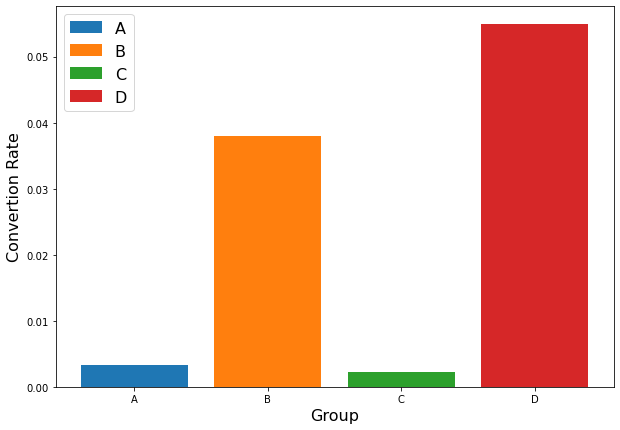

In [109]:
# visualisasi perbandingan convertion rate tiap grup
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Buat plot
ax.bar("A", cr_A, label="A")
ax.bar("B", cr_B, label="B")
ax.bar("C", cr_C, label="C")
ax.bar("D", cr_D, label="D")

# Styling plot
ax.set_ylabel("Convertion Rate", fontsize=16)
ax.set_xlabel("Group", fontsize=16)

plt.legend(fontsize=16)
plt.show();

In [110]:
# Gabung hasil dari experiment AB Testing untuk grup A, B, C, dan D

df_total = pd.concat([data_A,data_B,data_C,data_D])
df_total

,user id,test group,converted,total ads,most ads day,most ads hour,total ads group,group
549699,922187,psa,False,2,Tuesday,9,<15,A
218284,909961,psa,False,9,Thursday,14,<15,A
439360,920939,psa,False,1,Saturday,20,<15,A
527476,900626,psa,False,4,Friday,15,<15,A
500435,915897,psa,False,8,Sunday,22,<15,A
...,...,...,...,...,...,...,...,...
82046,1253451,ad,False,64,Sunday,21,>15,D
256349,1620702,ad,True,83,Tuesday,10,>15,D
569898,1376836,ad,False,24,Saturday,10,>15,D
140092,1213024,ad,True,24,Tuesday,15,>15,D


### E.	Analyzing and Interpreting the Data

### 1.	Ensure the trustworthiness

**Some mechanism to Ensure Trustworthiness are :**
1. Validate data quality
2. Avoid threat to internal validity
3. Avoid threat to external validity
4. Mitigate the effect of simpson’s paradox

#### **Data Quality**

We can use the following checklist to measure data quality :
- Missing rates : How much missing value in dataset
- Uniqueness : No duplicate data
- Invalid values : Do the values follow the proper format? Are the values valid for the variable/column?
- Data delays : How many data is there at the periode of the experiment? How long does it take between when the events were logged and when the data is available for analysis?

#### Handle the NaN Data

- First we have to find the NaN value in each columns

In [57]:
for col in df_total.columns:
    print(df_total[col].value_counts(dropna = False))
    print("")

922187     1
1245581    1
1323655    1
1194713    1
1224476    1
          ..
909465     1
900547     1
917044     1
920243     1
1017209    1
Name: user id, Length: 12320, dtype: int64

psa    6160
ad     6160
Name: test group, dtype: int64

False    12017
True       303
Name: converted, dtype: int64

1      1034
2       798
5       586
3       577
4       473
       ... 
259       1
294       1
305       1
190       1
245       1
Name: total ads, Length: 299, dtype: int64

Friday       2064
Thursday     1858
Monday       1797
Wednesday    1788
Sunday       1680
Saturday     1608
Tuesday      1525
Name: most ads day, dtype: int64

12    1098
11    1019
13    1018
15     972
14     946
16     785
17     769
10     760
18     716
19     641
21     608
9      586
20     579
22     531
23     389
8      328
7      137
0      109
1      109
2      106
3       46
6       41
4       17
5       10
Name: most ads hour, dtype: int64

<15    6160
>15    6160
Name: total ads group, dtype: int64



- Sanity check

In [58]:
for col in df_total.columns:
    print(df_total[col].value_counts(dropna = False))
    print("")

922187     1
1245581    1
1323655    1
1194713    1
1224476    1
          ..
909465     1
900547     1
917044     1
920243     1
1017209    1
Name: user id, Length: 12320, dtype: int64

psa    6160
ad     6160
Name: test group, dtype: int64

False    12017
True       303
Name: converted, dtype: int64

1      1034
2       798
5       586
3       577
4       473
       ... 
259       1
294       1
305       1
190       1
245       1
Name: total ads, Length: 299, dtype: int64

Friday       2064
Thursday     1858
Monday       1797
Wednesday    1788
Sunday       1680
Saturday     1608
Tuesday      1525
Name: most ads day, dtype: int64

12    1098
11    1019
13    1018
15     972
14     946
16     785
17     769
10     760
18     716
19     641
21     608
9      586
20     579
22     531
23     389
8      328
7      137
0      109
1      109
2      106
3       46
6       41
4       17
5       10
Name: most ads hour, dtype: int64

<15    6160
>15    6160
Name: total ads group, dtype: int64



#### Remove duplicate data

- Find the duplicate data, especially on `user id`
- It has to be unique.

In [59]:
# Find the duplicate
df_total[df_total["user id"].duplicated()]

,user id,test group,converted,total ads,most ads day,most ads hour,total ads group,group


#### Remove invalid value

We need to make sure that there is no wrong group.

  - Group A should contain test group **psa** and total ads **<15**
  - Group B should contain test group **psa** and total ads **>15**
  - Group C should contain test group **ad** and total ads **<15**
  - Group D should contain test group **ad** and total ads **>15**

- Find the wrong group in group A
    - group : `A`
    - correct combination : `psa` + `<15`
    - wrong combination 1 : `psa` + `>15`
    - wrong combination 2 : `ad` + `<15`
    - wrong combination 3 : `ad` + `>15`

In [60]:
# Check for non-matching groups & elements
group_name = "A"
type_test_group = "psa"
type_total_ads = "<15"

# Make condition
condition_group = df_total["group"] == group_name
condition_test_group = df_total["test group"] == type_test_group
condition_total_ads = df_total["total ads group"] == type_total_ads

# Select data with the conditions above
data_salah_1 = df_total[condition_group & ~(condition_test_group & condition_total_ads)]

In [61]:
# display wrong data
data_salah_1.head()

,user id,test group,converted,total ads,most ads day,most ads hour,total ads group,group


- Find the wrong group in group B
    - group : `B`
    - correct combination : `psa` + `>15`
    - wrong combination 1 : `psa` + `<15`
    - wrong combination 2 : `ad` + `<15`
    - wrong combination 3 : `ad` + `>15`

In [62]:
# Check for non-matching groups & elements
group_name = "B"
type_test_group = "psa"
type_total_ads = ">15"

# Make condition
condition_group = df_total["group"] == group_name
condition_test_group = df_total["test group"] == type_test_group
condition_total_ads = df_total["total ads group"] == type_total_ads

# Select data with the conditions above
data_salah_2 = df_total[condition_group & ~(condition_test_group & condition_total_ads)]

In [63]:
# display wrong data
data_salah_2.head()

,user id,test group,converted,total ads,most ads day,most ads hour,total ads group,group


In [64]:
# Check for non-matching groups & elements
group_name = "C"
type_test_group = "ad"
type_total_ads = "<15"

# Make condition
condition_group = df_total["group"] == group_name
condition_test_group = df_total["test group"] == type_test_group
condition_total_ads = df_total["total ads group"] == type_total_ads

# Select data with the conditions above
data_salah_3 = df_total[condition_group & ~(condition_test_group & condition_total_ads)]

In [65]:
# display wrong data
data_salah_3.head()

,user id,test group,converted,total ads,most ads day,most ads hour,total ads group,group


In [66]:
# Check for non-matching groups & elements
group_name = "D"
type_test_group = "ad"
type_total_ads = ">15"

# Make condition
condition_group = df_total["group"] == group_name
condition_test_group = df_total["test group"] == type_test_group
condition_total_ads = df_total["total ads group"] == type_total_ads

# Select data with the conditions above
data_salah_4 = df_total[condition_group & ~(condition_test_group & condition_total_ads)]

In [67]:
# display wrong data
data_salah_4.head()

,user id,test group,converted,total ads,most ads day,most ads hour,total ads group,group


There is no wrong group division

### **2. Data Exploration**

#### To fill in the table, we have to filter the data based on the group

In [69]:
# Percentage in each group
n_total = df_total.shape[0]
persen_A = n_A/n_total * 100 # Control
persen_B = n_B/n_total * 100 # Treatment 1
persen_C = n_C/n_total * 100 # Treatment 2
persen_D = n_D/n_total * 100 # Treatment 3

print(f"% A   : {persen_A:.2f}%")
print(f"% B   : {persen_B:.2f}%")
print(f"% C   : {persen_C:.2f}%")
print(f"% D   : {persen_D:.2f}%")

% A   : 25.00%
% B   : 25.00%
% C   : 25.00%
% D   : 25.00%


- We get

<center>

|Group|# user|Percentage|
|:--|:--:|:--:|
|A|3080|25.00%|
|B|3080|25.00%|
|C|3080|25.00%|
|D|3080|25.00%|

</center>

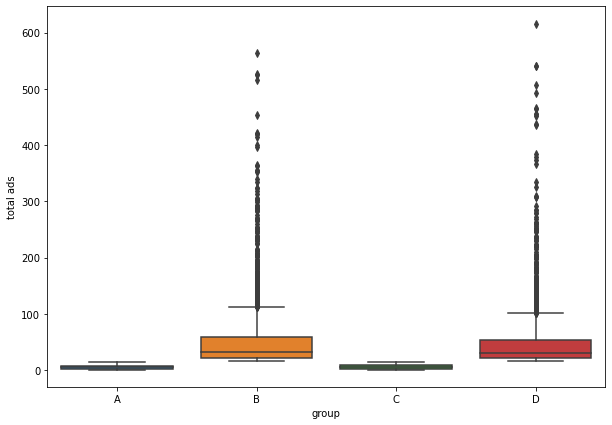

In [121]:
# import library
import seaborn as sns
import matplotlib.pyplot as plt

# make boxplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
sns.boxplot(x = 'group',
            y = 'total ads',
            data = df_total,
            ax = ax)

plt.show()

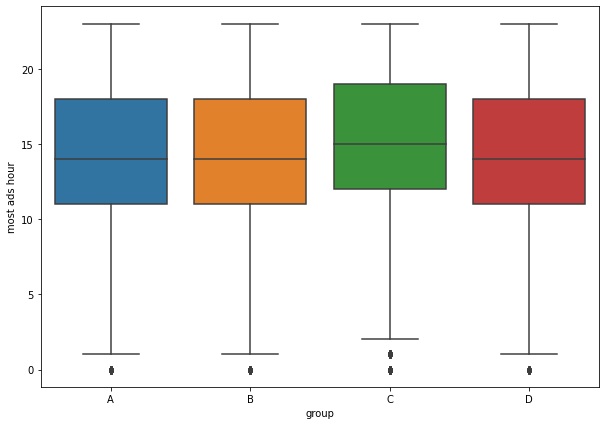

In [163]:
# import library
import seaborn as sns
import matplotlib.pyplot as plt

# make boxplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
sns.boxplot(x = 'group',
            y = 'most ads hour',
            data = df_total,
            ax = ax)

plt.show()

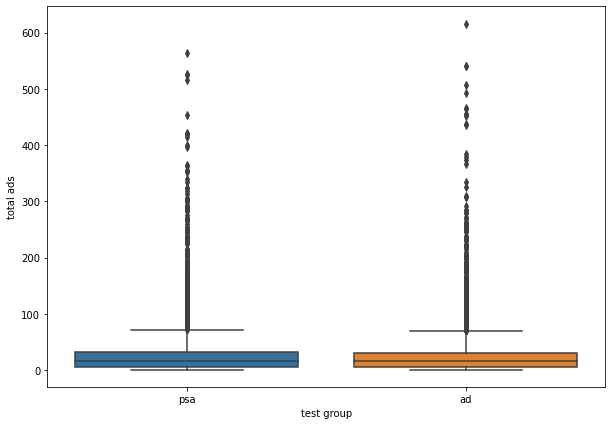

In [125]:
# make boxplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
sns.boxplot(x = 'test group',
            y = 'total ads',
            data = df_total,
            ax = ax)

plt.show()

[Text(0.5, 1.0, 'Proportion of Converted')]

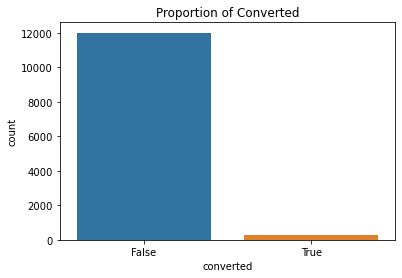

In [138]:
sns.countplot(data=df_total, x="converted").set(title='Proportion of Converted')

[Text(0.5, 1.0, 'Proportion of Ads by Day')]

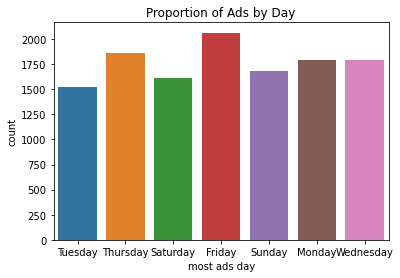

In [164]:
sns.countplot(data=df_total, x="most ads day").set(title='Proportion of Ads by Day')

In [ ]:
sns.countplot(data=df_total, x="most ads day").set(title='Proportion of Ads')

In [147]:
df_true = df_total[df_total["converted"] == True]
df_false = df_total[df_total["converted"] == False]
df_false

,user id,test group,converted,total ads,most ads day,most ads hour,total ads group,group
549699,922187,psa,False,2,Tuesday,9,<15,A
218284,909961,psa,False,9,Thursday,14,<15,A
439360,920939,psa,False,1,Saturday,20,<15,A
527476,900626,psa,False,4,Friday,15,<15,A
500435,915897,psa,False,8,Sunday,22,<15,A
...,...,...,...,...,...,...,...,...
308935,1055769,ad,False,33,Sunday,9,>15,D
92592,1357635,ad,False,115,Monday,12,>15,D
253022,1097466,ad,False,22,Monday,12,>15,D
82046,1253451,ad,False,64,Sunday,21,>15,D


C:\Users\Axel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Axel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


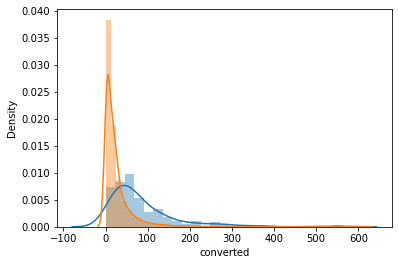

In [169]:
# plotting charges smoker and charges non-smoker distribution on the same figure
fig_a = sns.distplot(df_true["total ads"], axlabel='converted', kde=True)
fig_b = sns.distplot(df_false["total ads"], axlabel='converted', kde=True)
plt.show()

C:\Users\Axel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Axel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


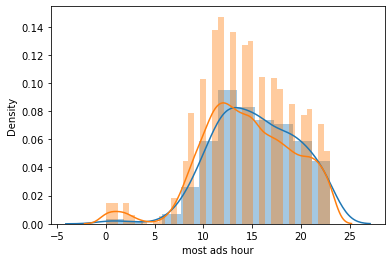

In [161]:
# plotting charges smoker and charges non-smoker distribution on the same figure
fig_a = sns.distplot(df_true["most ads hour"], axlabel='most ads hour', kde=True)
fig_b = sns.distplot(df_false["most ads hour"], axlabel='most ads hour', kde=True)
plt.show()

### **3. Sample Ratio Mismatch (SRM)**
* Sample Ratio Mismatch (SRM) is the situation when the observed sample ratio in the experiment is different from the expected.

* **Chi-square test** can be used to detect whether an experiment has SRM or not.

The steps for doing a chi-square test in order to detect SRM are:
1. Define the null and alternative hypothesis (H0 and H1)
2. Calculate chi-square statistics
3. Define decision rules
4. Make decisions and draw a conclusion


### Chi-Square Test for Detect SRM

The steps for doing a chi-square test in order to detect SRM are:

**1. Define the null and alternative hypothesis ($H_0$ and $H_1$)**

$H_0$  : No SRM detected

$H_1$  : SRM detected

**2. Calculate chi-square statistics**

$$ \chi^2 = \sum \frac{\left ( \text{observed - expected} \right )^2}{\text{expected}} $$

Where :
- Observed: the control and variation traffic volumes (sample size), respectively
- Expected: the expected values for control and treatment — i.e. the total observed divided by 4


Observed is the same as # user in each group.

For calculate expexted in each group, we can use total observed divided by 4


In [71]:
observed = [ n_A, n_B, n_C, n_D ]
total_traffic= sum(observed)
expected = [ total_traffic/4, total_traffic/4, total_traffic/4, total_traffic/4 ]

Then we can calculate the chi-square statistics using the function in the `scipy` library, namely `chisquare` with steps: 

1. import library
  - from scipy.stats import chisquare
2. Use the function `chisquare(f_obs, f_exp=...)`
    - `f_obs`: Observed frequencies in each category (array)
    - `f_exp`: Expected frequencies in each category. By default the categories are assumed to be equally likely.

In [72]:
#calculate chi-square statistics
from scipy.stats import chisquare
chi = chisquare(observed, f_exp=expected)
print(chi)

Power_divergenceResult(statistic=0.0, pvalue=1.0)


**3. Define decision rules**

In making statistical test decisions, we can use:
- Comparison of chi-square statistics with critical value
     -  $\chi^2 > \chi^2_{\alpha,df}$ → reject $H_0$

- Comparison of p-value with alpha
   - pvalue < $\alpha$ → reject $H_0$


Normally, one would look for a p-value of 0.05 or less to proof of SRM. The problem with 0.05 is that it’s not strict enough for our purposes. Using this might give us a false signal. What we need is to be stricter for our test. So we use significance level 1%.

degree of freedom (df) is calculated as: 
$$ df = (rows − 1) × (columns − 1) $$ 


In [73]:
# Comparison of chi-square statistics with critical value
# We must calculate the critical first

# critical value is the chi-square value at alpha
alpha = 0.01
df=(2-1)*(2-1)  

import scipy
chi_critical = scipy.stats.chi2.ppf(1 - alpha, df)
print(f"Critical value: {chi_critical:.3f}")

Critical value: 6.635


In [74]:
#Make decisions from chi-square statistics and critical value
if chi[0] > chi_critical:
  print("Reject H0 : SRM may be present.")
else:
  print("Fail to reject H0 : No SRM")

Fail to reject H0 : No SRM


In [75]:
# Comparison of P-Value with alpha.
if chi[1] < 0.01:
    print('Reject H0 : SRM may be present.')
else:
    print('Fail to reject H0 : No SRM.')

Fail to reject H0 : No SRM.


#### Conclusion

Based on data quality, we have done data cleaning so that the data we use is of sufficient quality. But we need to check again, whether the sample size after data cleaning is sufficient (according to the experimental design) or not so that there is enough power to draw credible conclusions.

Based on the detection of SRM, although the sample size of the cleaned data in the control and treatment groups is different. However, SRM was not detected.

### 2.	Hypothesis Testing and Analyzing the Result

#### Calculate key evaluation criterion

In [76]:
def extract_evaluation(data):
    """
    Extract key evaluation criterion within the data
    - number of session
    - number of conversion
    - conversion rate
    :param data: <pandas DataFrame> sample data
    :return results: <dict> contain number of sess., number of conv., & conversion rate
    """
    # Number of session
    n_session = int(data.shape[0])

    # Number of conversion
    n_conversion = int(data["converted"].sum())

    # Conversion rate (in percent)
    conversion_rate = (n_conversion/n_session) * 100

    # Return results
    results = {}
    results["session"] = n_session
    results["conversion"] = n_conversion
    results["CVR"] = np.round(conversion_rate, 2)

    return results


In [77]:
control_res_A = extract_evaluation(data = data_A)
treatment_res_B = extract_evaluation(data = data_B)
treatment_res_C = extract_evaluation(data = data_C)
treatment_res_D = extract_evaluation(data = data_D)

In [78]:
print(f"CONTROL A: {control_res_A}")
print(f"TREATMENT B: {treatment_res_B}")
print(f"TREATMENT C: {treatment_res_C}")
print(f"TREATMENT D: {treatment_res_D}")

CONTROL A: {'session': 3080, 'conversion': 10, 'CVR': 0.32}
TREATMENT B: {'session': 3080, 'conversion': 117, 'CVR': 3.8}
TREATMENT C: {'session': 3080, 'conversion': 7, 'CVR': 0.23}
TREATMENT D: {'session': 3080, 'conversion': 169, 'CVR': 5.49}


#### Calculate lift-over-baseline

$$
\text{Lift} = CVR_{\text{treatment}} - CVR_{\text{control}}
$$

In [79]:
lift_B = treatment_res_B["CVR"] - control_res_A["CVR"]
lift_C = treatment_res_C["CVR"] - control_res_A["CVR"]
lift_D = treatment_res_D["CVR"] - control_res_A["CVR"]

In [80]:
print(f"Lift-overbaseline untuk treatment B adalah {lift_B} %")
print(f"Lift-overbaseline untuk treatment C adalah {lift_C} %")
print(f"Lift-overbaseline untuk treatment D adalah {lift_D} %")

Lift-overbaseline untuk treatment B adalah 3.48 %
Lift-overbaseline untuk treatment C adalah -0.09 %
Lift-overbaseline untuk treatment D adalah 5.17 %


####  **Multiple Hypothesis Testing with Benjamini-Hochberg Correction**
---

- To find out which one is the best, we can do a hypothesis testing.
- A suitable hypothesis test for this case is the z-test for proportion.
- Because we have more than two groups to compare, therefore we perform multiple hypothesis testing for each group pair.
- An issue with multiple hypothesis testing is increasing of Type I error, so we can do correction with Benjamini-Hochberg Correction 

**The following is the stage for conducting the analysis :**

##### 1. Define null hypothesis ($H_0$) and alternative hypothesis ($H_1$)

We want to compare whether group $i$ th is more than group $j$ th, so we use one sided (right tail) hypothesis testing.

we want to prove whether the conversion rate of group $j$ is greater than the conversion rate of group $i$

The hypothesis for each group pair is as follows:
- group A vs group B
    $$H_0 : p_B \leq p_A$$
    $$H_1 : p_B > p_A$$

- group A vs group C
    $$H_0 : p_C \leq p_A$$
    $$H_1 : p_C > p_A$$

- group A vs group D
    $$H_0 : p_D \leq p_A$$
    $$H_1 : p_D > p_A$$

- group B vs group C
    $$H_0 : p_C \leq p_B$$
    $$H_1 : p_C > p_B$$

- group B vs group D
    $$H_0 : p_D \leq p_B$$
    $$H_1 : p_D > p_B$$

- group C vs group D
    $$H_0 : p_D \leq p_C$$
    $$H_1 : p_D > p_C$$

- Set siginificance level (alpha)
 - Significance level = 0.05

##### 2. Calculate the p-value in each test

**Remember** the rule of thumbs

<img src="https://drive.google.com/uc?id=1EoXDTU8KDBl4Iu7H692lyZqF47d2zVsK">

In [81]:
#import library
from statsmodels.stats.proportion import proportions_ztest

# call function
#p-value group A vs group B hypotesis test
p_value_AB = proportions_ztest(count = [n_convertB, n_convertA],
                               nobs = [n_B, n_A],
                               alternative = 'larger')[1]

print(f"P-value A vs B: {p_value_AB:.4f}")

P-value A vs B: 0.0000


In [82]:
#p-value group A vs group C hypotesis test
p_value_AC = proportions_ztest(count = [n_convertC, n_convertA],
                               nobs = [n_C, n_A],
                               alternative = 'larger')[1]

print(f"P-value A vs C: {p_value_AC:.4f}")

P-value A vs C: 0.7669


In [83]:
#p-value group A vs group D hypotesis test
p_value_AD = proportions_ztest(count = [n_convertD, n_convertA],
                               nobs = [n_D, n_A],
                               alternative = 'larger')[1]

print(f"P-value A vs D: {p_value_AD:.4f}")

P-value A vs D: 0.0000


In [84]:
#p-value group B vs group C hypotesis test
p_value_BC = proportions_ztest(count = [n_convertC, n_convertB],
                               nobs = [n_C, n_B],
                               alternative = 'larger')[1]

print(f"P-value B vs C: {p_value_BC:.4f}")

P-value B vs C: 1.0000


In [85]:
#p-value group B vs group D hypotesis test
p_value_BD = proportions_ztest(count = [n_convertD, n_convertB],
                               nobs = [n_D, n_B],
                               alternative = 'larger')[1]

print(f"P-value B vs D: {p_value_BD:.4f}")

P-value B vs D: 0.0008


In [86]:
#p-value group C vs group D hypotesis test
p_value_CD = proportions_ztest(count = [n_convertD, n_convertC],
                               nobs = [n_D, n_C],
                               alternative = 'larger')[1]

print(f"P-value C vs D: {p_value_CD:.4f}")

P-value C vs D: 0.0000


In [87]:
# make dataframe consist of p-values
pair_group = ['B > A',
              'C > A',
              'D > A',
              'C > B',
              'D > B',
              'D > C']

p_vals = [p_value_AB, p_value_AC,
          p_value_AD, p_value_BC,
          p_value_BD, p_value_CD]

df_p_vals = pd.DataFrame({'pair_group': pair_group,
                          'p-value': p_vals})

#print
df_p_vals

,pair_group,p-value
0,B > A,4.231391e-22
1,C > A,7.668808e-01
2,D > A,8.512005e-34
3,C > B,1.000000e+00
4,D > B,8.197395e-04
5,D > C,1.489758e-35


##### 3. Arrange the p-values in order from smallest to largest (ascending order)

In [88]:
df_p_vals_order = df_p_vals.sort_values(by=['p-value'])
df_p_vals_order

,pair_group,p-value
5,D > C,1.489758e-35
2,D > A,8.512005e-34
0,B > A,4.231391e-22
4,D > B,8.197395e-04
1,C > A,7.668808e-01
3,C > B,1.000000e+00


##### 4. Assign ranks to the ordered p-values.

In [89]:
df_p_vals_order['rank'] = df_p_vals_order['p-value'].rank().sub(0).astype(int)
df_p_vals_order

,pair_group,p-value,rank
5,D > C,1.489758e-35,1
2,D > A,8.512005e-34,2
0,B > A,4.231391e-22,3
4,D > B,8.197395e-04,4
1,C > A,7.668808e-01,5
3,C > B,1.000000e+00,6


##### 5. Calculate each individual p-value’s Benjamini-Hochberg critical value

Using the formula :

$$\text{BH-critical value} = \left ( \frac{i}{m} \right )Q$$


where:
- $i$ = the p-value’s rank
- $m$ = total number of tests
- $Q$ = the false discovery rate (chosen by the experimenter)


- Suppose that, the experimenter want to control false discoverry rate in 5%. So the $Q=0.05$

In [90]:
#define Q
Q = 0.05

#calculate BH-critical value
df_p_vals_order['BH-crit'] = df_p_vals_order['rank']/len(df_p_vals_order)*Q

#print
df_p_vals_order

,pair_group,p-value,rank,BH-crit
5,D > C,1.489758e-35,1,0.008333
2,D > A,8.512005e-34,2,0.016667
0,B > A,4.231391e-22,3,0.025000
4,D > B,8.197395e-04,4,0.033333
1,C > A,7.668808e-01,5,0.041667
3,C > B,1.000000e+00,6,0.050000


##### Compare original p-values to the Benjamini-Hochberg critical value 

If the original p-values smaller than Benjamini-Hochberg critical, then the test are significant (reject $H_0$)


In [91]:
# make new column with condition
df_p_vals_order['Significant?'] = np.where(df_p_vals_order['p-value'] < df_p_vals_order['BH-crit'],
                                           'Yes',
                                           'No')

#print
df_p_vals_order

,pair_group,p-value,rank,BH-crit,Significant?
5,D > C,1.489758e-35,1,0.008333,Yes
2,D > A,8.512005e-34,2,0.016667,Yes
0,B > A,4.231391e-22,3,0.025000,Yes
4,D > B,8.197395e-04,4,0.033333,Yes
1,C > A,7.668808e-01,5,0.041667,No
3,C > B,1.000000e+00,6,0.050000,No


**Conclusion**
- Based on the results of multiple testing, test for group D vs group C, group D vs group A, group B vs group A, and group B vs group D resulted a significant outcome.
- Because our hypothesis is to compare whether group $j$ is more than group $i$, so it can be concluded that there is sufficient evidence that the conversion rate of group D (ad + total ads > 15) is higher than groups A, B and C.
- Group D is the group that has the highest conversion rate among all groups. 
- Group D becomes the winning version of the 4 combinations of the marketing company.
- It means that using creative ads with total ads > 15 statistically has an impact on increasing conversion rates.

#### Confidence interval of difference between Treatment and Control

After that, we will calculate the confidence interval to estimate within what range the difference or proportion discrepancy in the population lies

In [111]:
from statsmodels.stats.proportion import confint_proportions_2indep

confidence_interval_AB = confint_proportions_2indep(count1 = n_convertB, nobs1 = n_B,
                                                 count2 = n_convertA, nobs2 = n_A, 
                                                 compare='diff', alpha=0.05)
print(f"Difference A vs B: {confidence_interval_AB}")

Difference A vs B: (0.027973626325347657, 0.04223528870277167)


In [112]:
confidence_interval_AC = confint_proportions_2indep(count1 = n_convertC, nobs1 = n_C,
                                                 count2 = n_convertA, nobs2 = n_A, 
                                                 compare='diff', alpha=0.05)
print(f"Difference A vs C: {confidence_interval_AC}")

Difference A vs C: (-0.00393533428179327, 0.0018564693233408085)


In [113]:
confidence_interval_AD = confint_proportions_2indep(count1 = n_convertD, nobs1 = n_D,
                                                 count2 = n_convertA, nobs2 = n_A, 
                                                 compare='diff', alpha=0.05)
print(f"Difference A vs D: {confidence_interval_AD}")

Difference A vs D: (0.04364355498962791, 0.0603610044122684)


In [114]:
confidence_interval_BC = confint_proportions_2indep(count1 = n_convertC, nobs1 = n_C,
                                                 count2 = n_convertB, nobs2 = n_B, 
                                                 compare='diff', alpha=0.05)
print(f"Difference B vs C: {confidence_interval_BC}")

Difference B vs C: (-0.04315408851244238, -0.02906560982858217)


In [115]:
confidence_interval_BD = confint_proportions_2indep(count1 = n_convertD, nobs1 = n_D,
                                                 count2 = n_convertB, nobs2 = n_B, 
                                                 compare='diff', alpha=0.05)
print(f"Difference B vs D: {confidence_interval_BD}")

Difference B vs D: (0.006382694411223088, 0.027491572321206546)


In [116]:
confidence_interval_CD = confint_proportions_2indep(count1 = n_convertD, nobs1 = n_D,
                                                 count2 = n_convertC, nobs2 = n_C, 
                                                 compare='diff', alpha=0.05)
print(f"Difference C vs D: {confidence_interval_CD}")

Difference C vs D: (0.04471735713003535, 0.061287704427821436)


In [117]:
confidence_interval_AB = list(confidence_interval_AB)
confidence_interval_AC = list(confidence_interval_AC)
confidence_interval_AD = list(confidence_interval_AD)
confidence_interval_BC = list(confidence_interval_BC)
confidence_interval_BD = list(confidence_interval_BD)
confidence_interval_CD = list(confidence_interval_CD)

index = ['confidence_interval_AB','confidence_interval_AC','confidence_interval_AD','confidence_interval_BC',
         'confidence_interval_BD','confidence_interval_CD']

confidence_interval = [confidence_interval_AB, confidence_interval_AC, confidence_interval_AD,
                      confidence_interval_BC, confidence_interval_BD, confidence_interval_CD]

df_ci = pd.DataFrame(confidence_interval, columns = ["lower","upper"])
df_ci = df_ci.set_index([index])

Based on these results, we are 95% confident that the difference in proportion of users who converted between the treatment group (B) and the control group (A) can be seen in the table below.

Or it can be said that the increase in conversion rate using the Creative Ad method (treatment) has increased according to the table below.

In [118]:
df_ci

,lower,upper
confidence_interval_AB,0.027974,0.042235
confidence_interval_AC,-0.003935,0.001856
confidence_interval_AD,0.043644,0.060361
confidence_interval_BC,-0.043154,-0.029066
confidence_interval_BD,0.006383,0.027492
confidence_interval_CD,0.044717,0.061288


Recommendation for the marketing company: based on the statistical test results, it is statistically significant. However, to make a decision whether to use creative ads or not, it needs to be ensured whether it is practically significant such as the cost of using ads, marketing costs, etc. should not incur losses.

With a minimum difference in conversion rate of 1%, the Confidence Interval values for A vs D (4.47% - 6.13%)  so that the use of Creative Ads is recommended.

#### Calculate the Probability to Be Best (PBB)

- To get sense of chance of a variation to have the best performance in the long term, we simulate its probability distribution given **the current** data
- **Bayesian** approach it is!

- Simply, we use the Bayesian theorem to find our update believe (posterior) about something that we know (prior) given the data (likelihood).

$$
P(\mu | z) \propto P(\mu) P(z|\mu)
$$

- $P(\mu)$ is the prior probability to find our current conversion rate ($\mu$). 
- Because it is `convert` or `not convert`, the probability must be following the binomial distribution.
- Thus,

$$
P(\mu) \sim \text{Binomial}(\mu, n_{\text{trial}}, n_{\text{success}})
$$

- $P(z|\mu)$ is the likelihood.
- Why we need this? Because, even the CRV is similar, however it is different between:
  - 1 conversion from 10 users
  - 12 conversions from 100 users
  - 70 conversions from 500 users

<img src="https://www.dynamicyield.com/wp-content/uploads/2016/09/Bayesian-Statistics-Graph.png">

- We can model the above distribution using **Beta** distribution.
- Why? because beta distribution return value between 0-1.

$$
P(z|\mu) \sim \text{Beta}(\alpha, \beta)
$$

- Multiply both the prior and likelihood to obtain the posterior.
- In short, we get the posterior distribution as

$$
P(\mu|z) \sim \text{Beta}(\alpha=n_{\text{success}}+1, \beta=n_{\text{fail}}+1)
$$

In [100]:
# Create a function to find the posterior distribution
def generate_posterior(results):
    """
    Function to generate the posterior distribution from a group result
    posterior distribution
        P(CVR | z) ~ Beta(a = n_success + 1,
                          b = n_fail + 1)
    :param results: <dict> summary of evaluation criteria
    :return posterior: <list> simulation of posterior distribution
    """
    # Ekstrak value
    n_trial = results["session"]
    n_success = results["conversion"]
    n_fail = n_trial - n_success

    # Generate posterior
    posterior = stats.beta.rvs(a = 1 + n_success,
                               b = 1 + (n_trial-n_success),
                               size = 10_000)
    
    return posterior


In [101]:
# Generate posterior results of control & treatment
control_posterior_A = generate_posterior(results = control_res_A)
treatment_posterior_B = generate_posterior(results = treatment_res_B)
treatment_posterior_C = generate_posterior(results = treatment_res_C)
treatment_posterior_D = generate_posterior(results = treatment_res_D)

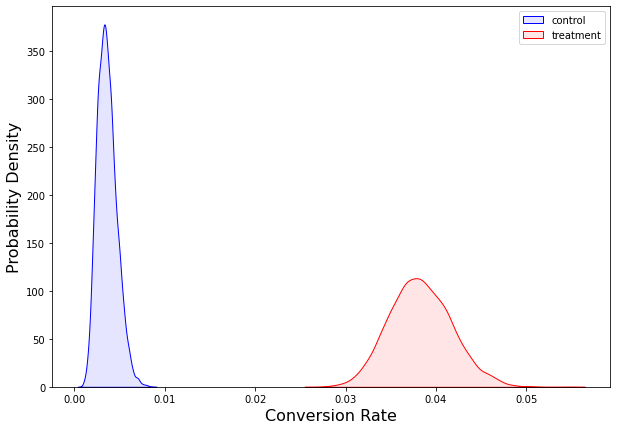

In [102]:
# Plot the results
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))

sns.kdeplot(data = control_posterior_A, 
            color = "blue", 
            label = "control", 
            fill = True,
            alpha = 0.1,
            ax = ax)
sns.kdeplot(data = treatment_posterior_B, 
            color = "red", 
            label = "treatment", 
            fill = True,
            alpha = 0.1,
            ax = ax)

ax.set_ylabel("Probability Density", fontsize=16)
ax.set_xlabel("Conversion Rate", fontsize=16)
plt.legend()
plt.show()

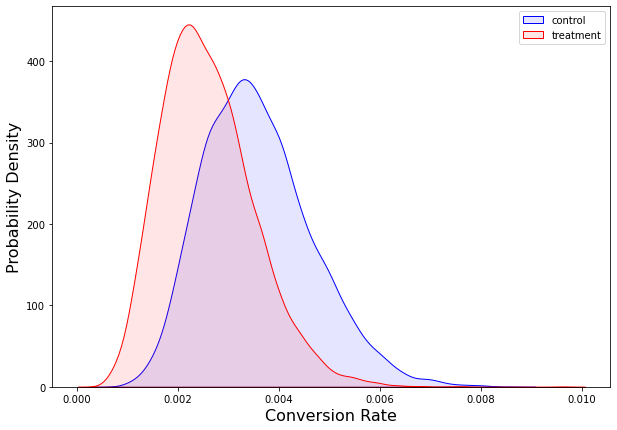

In [103]:
# Plot the results
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))

sns.kdeplot(data = control_posterior_A, 
            color = "blue", 
            label = "control", 
            fill = True,
            alpha = 0.1,
            ax = ax)
sns.kdeplot(data = treatment_posterior_C, 
            color = "red", 
            label = "treatment", 
            fill = True,
            alpha = 0.1,
            ax = ax)

ax.set_ylabel("Probability Density", fontsize=16)
ax.set_xlabel("Conversion Rate", fontsize=16)
plt.legend()
plt.show()

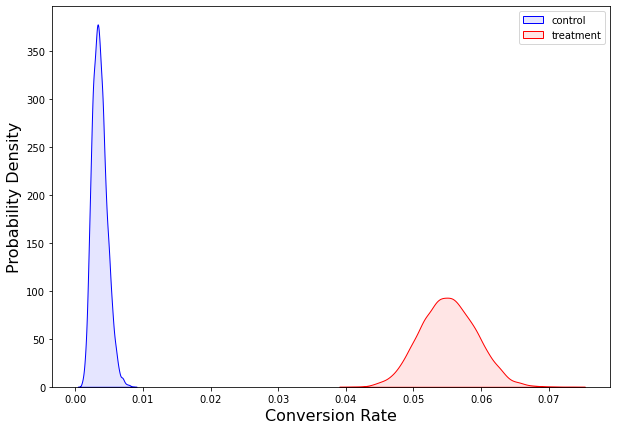

In [104]:
# Plot the results
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))

sns.kdeplot(data = control_posterior_A, 
            color = "blue", 
            label = "control", 
            fill = True,
            alpha = 0.1,
            ax = ax)
sns.kdeplot(data = treatment_posterior_D, 
            color = "red", 
            label = "treatment", 
            fill = True,
            alpha = 0.1,
            ax = ax)

ax.set_ylabel("Probability Density", fontsize=16)
ax.set_xlabel("Conversion Rate", fontsize=16)
plt.legend()
plt.show()

In [105]:
control_win_B = control_posterior_A - treatment_posterior_B
control_win_C = control_posterior_A - treatment_posterior_C
control_win_D = control_posterior_A - treatment_posterior_D

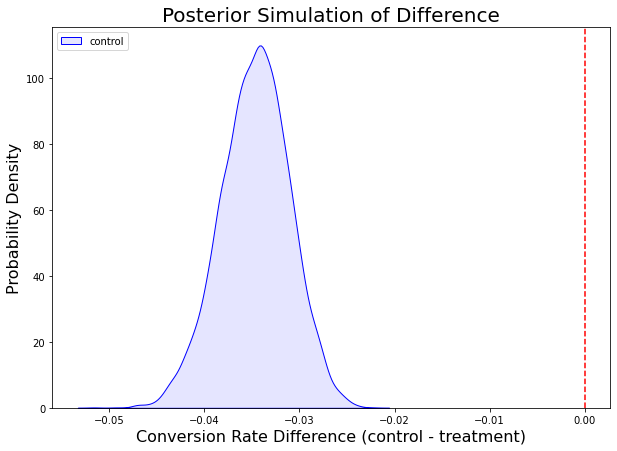

In [106]:
# Plot the results
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))

sns.kdeplot(data = control_win_B, 
            color = "blue", 
            label = "control", 
            fill = True,
            alpha = 0.1,
            ax = ax)
ax.axvline(0.0000, color = "red", linestyle="--")

ax.set_title("Posterior Simulation of Difference", fontsize=20)
ax.set_ylabel("Probability Density", fontsize=16)
ax.set_xlabel("Conversion Rate Difference (control - treatment)", fontsize=16)
plt.legend()
plt.show()

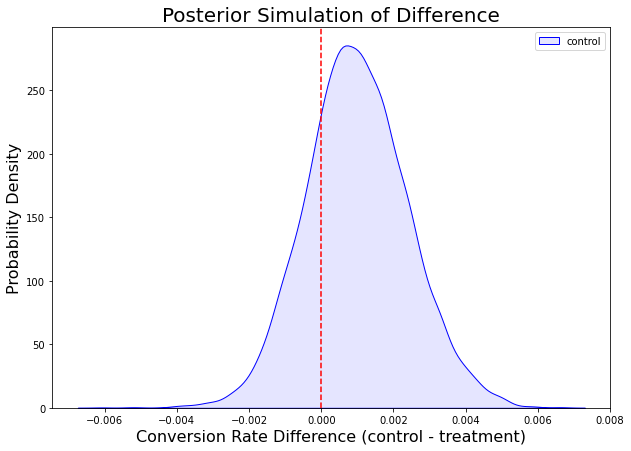

In [107]:
# Plot the results
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))

sns.kdeplot(data = control_win_C, 
            color = "blue", 
            label = "control", 
            fill = True,
            alpha = 0.1,
            ax = ax)
ax.axvline(0.0000, color = "red", linestyle="--")

ax.set_title("Posterior Simulation of Difference", fontsize=20)
ax.set_ylabel("Probability Density", fontsize=16)
ax.set_xlabel("Conversion Rate Difference (control - treatment)", fontsize=16)
plt.legend()
plt.show()

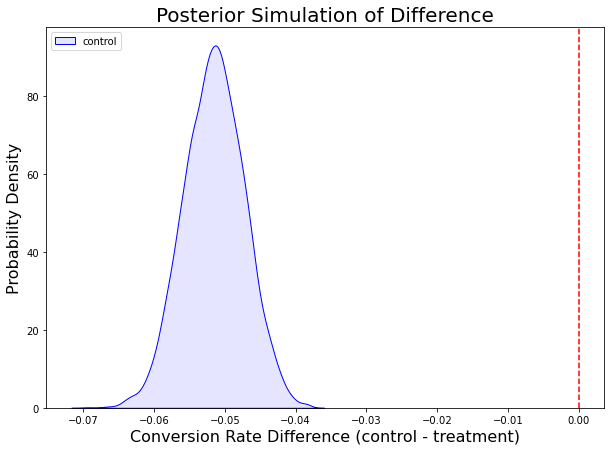

In [108]:
# Plot the results
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))

sns.kdeplot(data = control_win_D, 
            color = "blue", 
            label = "control", 
            fill = True,
            alpha = 0.1,
            ax = ax)
ax.axvline(0.0000, color = "red", linestyle="--")

ax.set_title("Posterior Simulation of Difference", fontsize=20)
ax.set_ylabel("Probability Density", fontsize=16)
ax.set_xlabel("Conversion Rate Difference (control - treatment)", fontsize=16)
plt.legend()
plt.show()